In [1]:
%load_ext autoreload
%autoreload
%autoreload 2

In [2]:
from flux_gen_redux import FluxGenerator, FluxDatasetGenerator
from synthetic_torch_helpers import SyntheticFluxDataset, H5Dataset, SynH5Dataset

In [3]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import os

import datetime

In [4]:
eigen_spectra = fits.open('spMLpcaGal-55331-7temp.fits')
e_templates = eigen_spectra[0].data

In [5]:
from marvin.tools.cube import Cube
cube = Cube(plateifu='9876-12704')
# get a spaxel by slicing cube[i,j]
spaxel=cube[16, 16]
flux = spaxel.flux
manga_wave = np.array(flux.wavelength)

/uufs/chpc.utah.edu/common/home/u0897718/MYTF/lib/python3.6/site-packages/sqlalchemy/sql/functions.py:68: SAWarning: The GenericFunction 'array_agg' is already registered and is going to be overriden.
  "is going to be overriden.".format(identifier))


INFO: No release version set. Setting default to DR15


/uufs/chpc.utah.edu/common/home/u0897718/MYTF/lib/python3.6/site-packages/marvin/__init__.py:369: MarvinUserWarning: path /uufs/chpc.utah.edu/common/home/u0897718/sas/dr15/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None.
  .format(value), MarvinUserWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/

In [6]:
fg = FluxGenerator(e_templates, np.array(manga_wave), .001, a=1, noise=0.001, continuum=False)

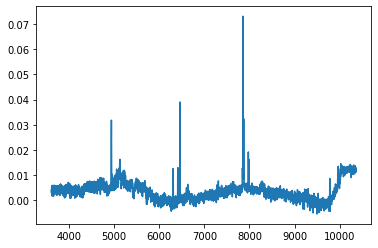

In [7]:
plt.plot(manga_wave, fg.generate())

In [6]:
200000*.25

50000.0

In [7]:
filename = "syn_flux_dataset_v2_val.h5"
fdg = FluxDatasetGenerator(filename, e_templates, manga_wave, 50000, 
                           zs=np.arange(0.0, .14, .0001), rs=(1000, 60000), noises=np.linspace(0.01, 0.0001, num=1000), continuums=[False],
                          track_params=True, description="Initail dataset created with newly refactored flux generation code. Weights being generated from a uniform distribution between 0 and 1.")


In [57]:
temp.close()

In [8]:
fdg.generate_dataset()

In [10]:
test = SynH5Dataset('syn_flux_dataset_v2.h5', load_to_memory=False)

In [11]:
test[0]

(tensor([[-0.1777, -0.1753, -0.1782,  ..., -0.0400, -0.0453, -0.0362]]),
 tensor([0.0723]))

AttributeError: module 'h5py' has no attribute 'dataset'

In [20]:
list(map(type, test[0]))

[torch.Tensor, torch.Tensor]

In [12]:
type(test.flux)

h5py._hl.dataset.Dataset

In [53]:
test.zs[0]

array([0.0723], dtype=float32)

In [51]:
test.flux[0]

array([[-0.17773141, -0.17534077, -0.17817225, ..., -0.04003515,
        -0.04527436, -0.03621668]], dtype=float32)

AttributeError: 'SynH5Dataset' object has no attribute 'close'

In [11]:
temp = h5.File('syn_flux_dataset_v2.h5', 'r')

In [12]:
np.allclose(temp.attrs['manga_wave'], manga_wave)

True

In [13]:
len(temp['zs'])

200000

In [ ]:
temp['zs'].min()

In [ ]:
plt.hist(temp['zs'])temp['zs'].

KeyboardInterrupt: 

In [ ]:
plt.hist(temp['as'])

In [ ]:
plt.hist(temp['noises'])

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=1, figsize=(20,20))
for ax, f, z, n, a, c in zip(axs, temp['flux'], temp['zs'], temp['noises'], temp['as'], temp['continuums']):
    ax.plot(manga_wave, f[0])
    ax.set_title("Z: {0:.2f}, A: {0:.2f}, Noise: {0:.2f}, Continuum: %r".format(z[0], a, n, c))